### URL 이미지 불러오기 및 바운딩 박스 그려보기

In [38]:
import requests
from PIL import Image, ImageDraw
from io import BytesIO

Image_url="https://cdn.pixabay.com/photo/2019/08/25/13/34/dogs-4429513_1280.jpg"


# 화면에 보여주기 위한 용도
response =requests.get(url)

image = Image.open(BytesIO(response.content))
draw = ImageDraw.Draw(image)

draw.rectangle([(10,10),(300,300)])


In [45]:
from dotenv import load_dotenv
import os
import requests

load_dotenv()

endpoint = os.getenv("VISION_ENDPOINT")
vision_api_key = os.getenv("VISION_API_KEY")
image_url = "https://example.com/image.jpg"

if endpoint is None:
    raise ValueError("endpoint가 설정되지 않았습니다. .env 파일 또는 코드 점검!")

## 객체를 탐지하기위해 바운딩 박스 만들기

mammal 0.94
dog 0.67


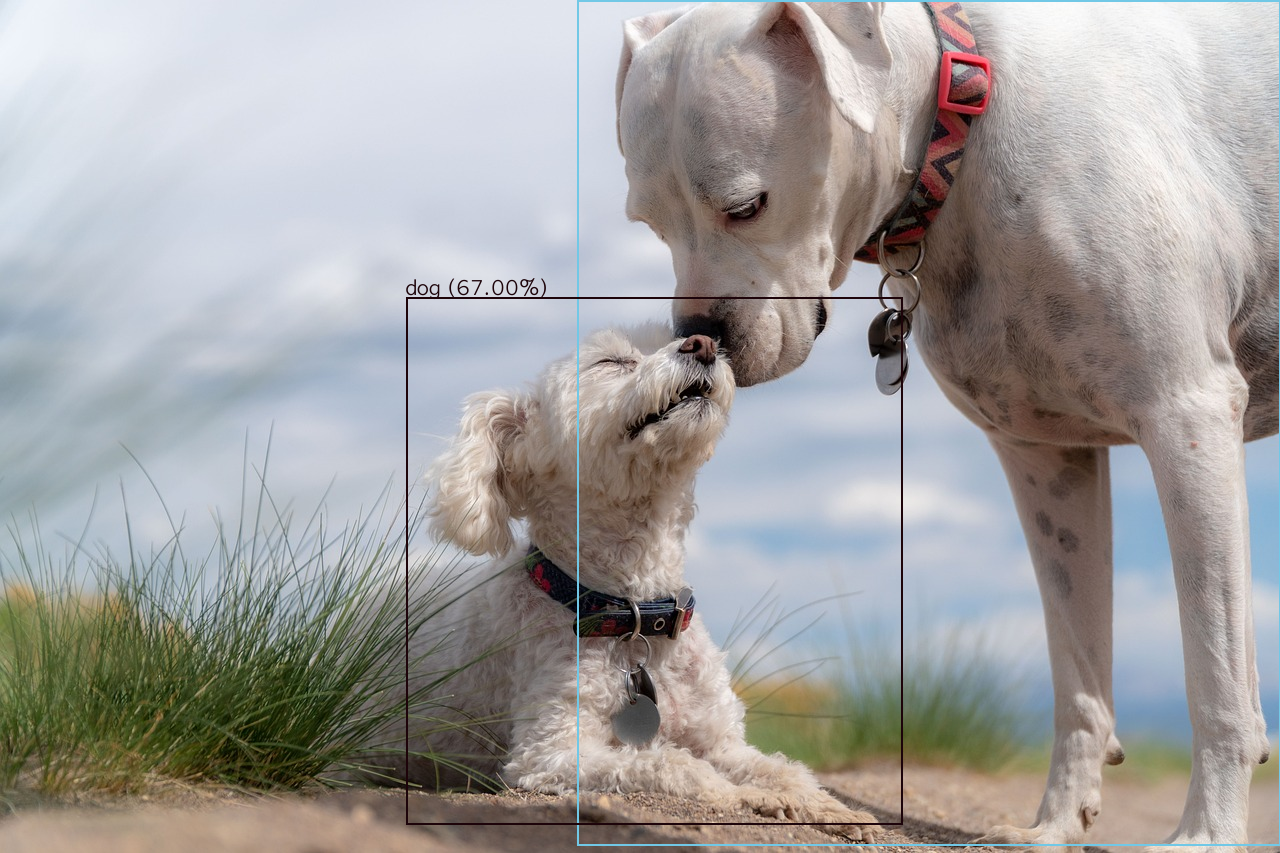

In [47]:
import requests
from PIL import Image, ImageDraw
from io import BytesIO
import os
import json
from dotenv import load_dotenv 


Image_url="https://cdn.pixabay.com/photo/2019/08/25/13/34/dogs-4429513_1280.jpg"

load_dotenv()

endpoint = os.getenv("VISION_ENDPOINT")
vision_api_key = os.getenv("VISION_API_KEY")

if endpoint is None:
    raise ValueError("endpoint가 설정되지 않았습니다. .env 파일 또는 코드 점검!")

def random_color():
    # 랜덤한 RGB 색상 튜플 반환
    import random
    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) 

def get_font():
    # OS별로 적절한 폰트 객체 반환 (한글 지원)
    from PIL import ImageFont
    import platform
    
    font_size = 20
    
    try:
        if platform.system() == "Windows":
            return ImageFont.truetype("malgun.ttf", font_size)
        elif platform.system() == "Darwin":  # macOS
            return ImageFont.truetype("AppleGothic.ttf", font_size)
        else:  # Linux      
            return ImageFont.load_default(size=font_size)
    except IOError:
        # 폰트 파일이 없을 경우 기본 폰트 사용
        return ImageFont.load_default(size=font_size)
    



def request_objects(url, endpoint, vision_api_key):

    endpoint=endpoint
    headers={
        "Ocp-Apim-Subscription-Key":vision_api_key
    }
    body={
        "url":url

    }
    response = requests.post(endpoint, headers=headers, json=body)

    if response.status_code != 200:
        print(f'Error : {response.status_code},{response.text}')
        return None

    response_json=response.json()
    return response_json


def draw_image(url,data):
    image_response=requests.get(url)

    image=Image.open(BytesIO(image_response.content))
    draw=ImageDraw.Draw(image)

    block_list = data['objectsResult']['values']
        
    for block in block_list:
        color = random_color()
        font=get_font()
        bounding_box = block['boundingBox'] # BoungingBox 객체에서 좌표를 가져와서 사각형을 그린다.
        tag=block['tags'][0] # confidencerk 0.5 이상인 경우에만 사각형을 그린다

        x, y, w, h = bounding_box['x'],bounding_box['y'],bounding_box['w'],bounding_box['h']
        name = tag['name']
        confidence = tag['confidence']

        formatted_text="{} ({:.2f}%)".format(name,confidence*100)

        #좌측 상단, 우측 하단
        draw.rectangle([(x,y),(x+w,y+h)], outline=color,width=2)
        draw.text((x,y-20), formatted_text, fill=color, font=font) # 사각형을 그린 후에 이미지에 텍스트를 추가한다.
        print(name, confidence)

    return image # 마지막으로 이미지를 화면에 보여준다.

response_json2=request_objects(Image_url, endpoint, vision_api_key)
draw_image(Image_url,response_json2)


## request Caption 만들기
### 아래부턴 강사님 코드에서 다시 수정 진행함. (앤드포인트,API KEY 만 변경)
### 앤드포인트 뒤, feature값만 추가해서 변경하기 위함.

In [8]:
# request_caption 함수 만들기

def request_caption(url):
    endpoint="https://7ai053-vision.cognitiveservices.azure.com/computervision/imageanalysis:analyze?api-version=2024-02-01&features=caption"
    headers={
        "Ocp-Apim-Subscription-Key":"2ULu8XTGf4EqMsxTeODbTBrFsPeSxbe3FluLoMsWqau8bWP8bIZTJQQJ99BGACYeBjFXJ3w3AAAFACOGYQSC"
    }
    body={
        "url":url
    }
    response=requests.post(endpoint,headers=headers,json=body)

    if response.status_code != 200:
        return None
    
    response_json=response.json()
    return response_json

#가장 하단에서 response_caption 선언
    

In [12]:
import requests
from PIL import Image, ImageDraw
from io import BytesIO


IMAGE_URL = "https://cdn.pixabay.com/photo/2019/08/25/13/34/dogs-4429513_1280.jpg"


def random_color():
    import random
    # 랜덤한 RGB 색상 튜플 반환
    import random
    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) 


def get_font():
    # OS별로 적절한 폰트 객체 반환 (한글 지원)
    from PIL import ImageFont
    import platform
    
    font_size = 20
    
    try:
        if platform.system() == "Windows":
            return ImageFont.truetype("malgun.ttf", font_size)
        elif platform.system() == "Darwin":  # macOS
            return ImageFont.truetype("AppleGothic.ttf", font_size)
        else:  # Linux      
            return ImageFont.load_default(size=font_size)
    except IOError:
        # 폰트 파일이 없을 경우 기본 폰트 사용
        return ImageFont.load_default(size=font_size)
    
# object함수
def request_objects(url):
    endpoint = "https://fimtrus-vision2.cognitiveservices.azure.com/computervision/imageanalysis:analyze?api-version=2024-02-01&features=objects"
    
    headers = {
        "Ocp-Apim-Subscription-Key": "1Xvo96LQT7LFAe6FgQUeO3f8UwOfELLcvZNJThBQW6LJsBdUhwzrJQQJ99BGACYeBjFXJ3w3AAAFACOGxEEM"
    }

    body = {
        "url": url
    }

    response = requests.post(endpoint, headers=headers, json=body)

    if response.status_code != 200:
        print("Error:", response.status_code, response.text)
        return None
        
    response_json = response.json()
    
    return response_json

# caption함수
def request_caption(url):
    endpoint="https://7ai053-vision.cognitiveservices.azure.com/computervision/imageanalysis:analyze?api-version=2024-02-01&features=caption&gender-neutral-caption=false"
    headers={
        "Ocp-Apim-Subscription-Key":"2ULu8XTGf4EqMsxTeODbTBrFsPeSxbe3FluLoMsWqau8bWP8bIZTJQQJ99BGACYeBjFXJ3w3AAAFACOGYQSC"
    }
    body={
        "url":url
    }
    response=requests.post(endpoint,headers=headers,json=body)

    if response.status_code != 200:
        return None
    
    response_json=response.json()
    return response_json

# smartcrop함수
def requests_smart_crops(url):
    endpoint="https://7ai053-vision.cognitiveservices.azure.com/computervision/imageanalysis:analyze?api-version=2024-02-01&features=tags&language=ko&smartCrops%26smartcrops-aspect-ratios=0.7"
    headers={
        "Ocp-Apim-Subscription-Key":"2ULu8XTGf4EqMsxTeODbTBrFsPeSxbe3FluLoMsWqau8bWP8bIZTJQQJ99BGACYeBjFXJ3w3AAAFACOGYQSC"
    }
    body={
        "url":url
    }

    response=requests.post(endpoint,headers=headers,json=body)

    if response.status_code != 200:
        return None
    response_json=response.json()
    return response_json


def draw_image(url, data):
    image_response = requests.get(url)

    image = Image.open(BytesIO(image_response.content))
    draw = ImageDraw.Draw(image)

    block_list = data['objectsResult']['values']

    for block in block_list:
        color = random_color()
        font = get_font()
        bounding_box = block['boundingBox']
        tag = block['tags'][0]
        
        x, y, w, h = bounding_box['x'], bounding_box['y'], bounding_box['w'], bounding_box['h']
        name = tag['name']
        confidence = tag['confidence']
        
        formatted_text = "{} ({:.2f}%)".format(name, confidence * 100)
        
        # 좌측 상단, 우측 하단
        draw.rectangle([(x, y), (x + w, y + h)], outline=color, width=2)
        draw.text((x, y - 20), formatted_text, fill=color, font=font)
        print(name, confidence)
    
    return image

#
response_json2 = requests_smart_crops(IMAGE_URL)
response_json2
#draw_image(IMAGE_URL, response_json2)


{'modelVersion': '2023-10-01',
 'metadata': {'width': 1280, 'height': 853},
 'tagsResult': {'values': [{'name': '야외', 'confidence': 0.9918951392173767},
   {'name': '동물', 'confidence': 0.9766309261322021},
   {'name': '포유류', 'confidence': 0.9721870422363281},
   {'name': '개 품종', 'confidence': 0.957706868648529},
   {'name': '바구밋과', 'confidence': 0.9086794853210449},
   {'name': '애완동물', 'confidence': 0.9069401025772095},
   {'name': '개목걸이', 'confidence': 0.9036297798156738},
   {'name': '지상', 'confidence': 0.8583760857582092},
   {'name': '잔디', 'confidence': 0.8453083038330078},
   {'name': '화이트', 'confidence': 0.7197825908660889},
   {'name': '개', 'confidence': 0.6855233907699585}]}}